<a href="https://colab.research.google.com/github/soyeonri/python-practice/blob/main/%ED%86%A0%ED%94%BD%EB%AA%A8%EB%8D%B8%EB%A7%81%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EC%95%84%ED%8C%8C%ED%8A%B8_%EC%9D%B8%ED%85%8C%EB%A6%AC%EC%96%B4_%ED%8A%B8%EB%A0%8C%EB%93%9C_%EB%B6%84%EC%84%9D(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **기본 라이브러리 설치**

In [ ]:
# 한글 폰트(나눔고딕) 설치 및 적용
!apt-get update -qq
!apt-get install fonts-nanum* -qq              # 나눔 폰트 설치

Selecting previously unselected package fonts-nanum.
(Reading database ... 155632 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
# 폰트를 적용하기 위해서는 상단 메뉴 "런타임> 런타임 다시 시작하기" 실행
%matplotlib inline
import matplotlib as mpl               # 기본 설정
import matplotlib.pyplot as plt        # 그래프 관련
import matplotlib.font_manager as fm   # 폰트 관련

#mpl.rcParams['axes.unicode_minus'] = False  ## 마이너스 부호가 깨지는 것 방지 
# 설치된 나눔글꼴중 원하는 폰트의 전체 경로 가져오기 
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)
fm._rebuild()  # 폰트 적용

NanumGothic Eco


In [ ]:
import requests  
from bs4 import BeautifulSoup  
import pandas as pd    
import numpy as np
import random, csv, time
import urllib.request

In [ ]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns

<br>

# **데이터 불러오기**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ohhouse = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BigMining/ohhouse.csv")

In [ ]:
ohhouse

,가족형태,스타일,시공 업체,스크랩,조회,게시일
0,싱글,미드센추리 모던 느낌을 더한 싱글 하우스 리모델링,(주)제이디자인,스크랩 231,"조회 15,423",2021
1,싱글,따뜻하고 안정감이 느껴지는 화이트 인테리어,루담 RUDAM,스크랩 116,"조회 6,003",2021
2,싱글,무광 포세린 타일이 매력적인 모던 프렌치 하우스,로그디자인,스크랩 722,"조회 40,603",2021
3,싱글,"선과 면이 깔끔한 공간, 가벽을 허물고 넓은 주방까지~",인테리어 몬스터,스크랩 215,"조회 16,937",2021
4,싱글,모던한 인테리어와 꼼꼼한 단열공사로 완성한 구축 APT,"(주)디자인그랩(부산,창원)",스크랩 101,"조회 7,303",2021
...,...,...,...,...,...,...
1923,기타,60평대 아파트인테리어,MID 먹줄,스크랩 36,"조회 11,277",2014
1924,기타,모두의 감성 그레이,옐로플라스틱,스크랩 87,"조회 12,426",2014
1925,기타,모던하면서도 따뜻하고 아늑한 집,HO DESIGN,스크랩 25,"조회 7,168",2014
1926,기타,고급스럽고 모던한 홈스타일링,쏘홈(SOHOME),스크랩 19,"조회 5,353",2014


<br>

# **데이터 전처리**

## **스크랩, 조회 글자 없애기**

In [ ]:
스크랩_split = ohhouse["스크랩"].str.split(" ")
ohhouse["스크랩수"] = 스크랩_split.str.get(1)

조회_split = ohhouse["조회"].str.split(" ")
ohhouse["조회수"] = 조회_split.str.get(1)


In [ ]:
ohhouse_df = ohhouse.drop(columns=['스크랩', '조회'])

In [ ]:
ohhouse_df.head()

,가족형태,스타일,시공 업체,게시일,스크랩수,조회수
0,싱글,미드센추리 모던 느낌을 더한 싱글 하우스 리모델링,(주)제이디자인,2021,231,"15,423"
1,싱글,따뜻하고 안정감이 느껴지는 화이트 인테리어,루담 RUDAM,2021,116,"6,003"
2,싱글,무광 포세린 타일이 매력적인 모던 프렌치 하우스,로그디자인,2021,722,"40,603"
3,싱글,"선과 면이 깔끔한 공간, 가벽을 허물고 넓은 주방까지~",인테리어 몬스터,2021,215,"16,937"
4,싱글,모던한 인테리어와 꼼꼼한 단열공사로 완성한 구축 APT,"(주)디자인그랩(부산,창원)",2021,101,"7,303"


In [ ]:
ohhouse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   가족형태    1928 non-null   object
 1   스타일     1928 non-null   object
 2   시공 업체   1928 non-null   object
 3   게시일     1928 non-null   int64 
 4   스크랩수    1928 non-null   object
 5   조회수     1928 non-null   object
dtypes: int64(1), object(5)
memory usage: 90.5+ KB


## **date time으로 바꾸기**

<BR>

## **콤마 없애기**

In [ ]:
def remove_comma(x):
     return x.replace(',', '')

ohhouse_df['스크랩수'] = ohhouse_df['스크랩수'].apply(remove_comma) 
ohhouse_df['조회수'] = ohhouse_df['조회수'].apply(remove_comma)
ohhouse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   가족형태    1928 non-null   object
 1   스타일     1928 non-null   object
 2   시공 업체   1928 non-null   object
 3   게시일     1928 non-null   int64 
 4   스크랩수    1928 non-null   object
 5   조회수     1928 non-null   object
dtypes: int64(1), object(5)
memory usage: 90.5+ KB


<BR>

## **데이터 타입 바꾸기**

In [ ]:
ohhouse_df = ohhouse_df.astype({'스크랩수': np.int64})
ohhouse_df = ohhouse_df.astype({'조회수': np.int64})
ohhouse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   가족형태    1928 non-null   object
 1   스타일     1928 non-null   object
 2   시공 업체   1928 non-null   object
 3   게시일     1928 non-null   int64 
 4   스크랩수    1928 non-null   int64 
 5   조회수     1928 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 90.5+ KB


<br>

## **데이터 열 이름 바꾸기**

In [ ]:
ohhouse_df.rename(columns = {'시공 업체' : '시공업체'}, inplace = True)

<BR>

# **EDA**

## **시공 업체 게시글 수 순위**

In [ ]:
ohhouse_df['시공업체'].value_counts().sort_values(ascending=False).iloc[:20]

디자인담다           84
라움디자인           77
Zip Story       71
(주)미소디자인        62
카멜레온디자인         57
릴스퀘어            39
BK Design       36
공간다시            34
홈라떼             33
아르떼디자인          32
커먼그라운드          31
하우스테라피          28
라루나홈스타일링        23
사람과공간 쉼표디자인     21
예이제 디자인 스페이스    19
퍼스트애비뉴 인테리어     18
앤드컴퍼니           18
유한회사 투 플라이      18
kate 홈스타일링      17
(주)제이디자인        17
Name: 시공업체, dtype: int64

Text(0.5, 1.0, '시공 업체 순위')

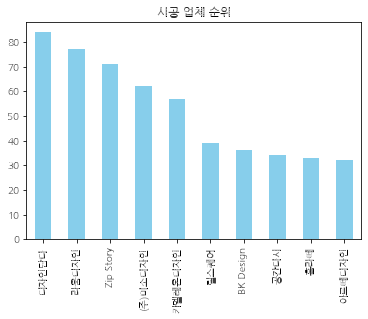

In [ ]:
ohhouse_df['시공업체'].value_counts().sort_values(ascending=False).iloc[:10].plot(kind='bar', color = 'skyblue')
plt.title('시공 업체 순위')

<br>

## **가족 형태 게시글 수 순위**

In [ ]:
ohhouse_df['가족형태'].value_counts().sort_values(ascending=False)

취학자녀    717
신혼부부    521
아기      420
기타      121
부모님      80
싱글       69
Name: 가족형태, dtype: int64

Text(0.5, 1.0, '가족형태 순위')

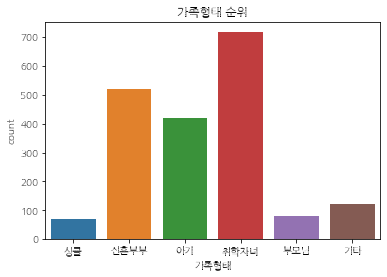

In [ ]:
 sns.countplot(data=ohhouse_df, x='가족형태')
 plt.title('가족형태 순위')

<br>

## **시공 업체 스크랩수 순위**

In [ ]:
ohhouse_df.groupby('시공업체')['스크랩수'].sum().sort_values(ascending=False).iloc[:20]

시공업체
Zip Story      34004
라움디자인          32187
공간다시           31802
BK Design      28566
커먼그라운드         25194
카멜레온디자인        24570
릴스퀘어           23941
디자인담다          23163
멜로맨스디자인        21577
아르떼디자인         18459
봄디자인           16306
퍼스트애비뉴 인테리어    16261
(주)미소디자인       15954
디자인브리드         12590
interior오월     12569
보운디자인          11986
일리디자인          11945
사람과공간 쉼표디자인    11574
(주)더라움 인테리어    11288
햇살장식 X 인테리어    11179
Name: 스크랩수, dtype: int64

Text(0.5, 1.0, '시공 업체 스크랩수 순위')

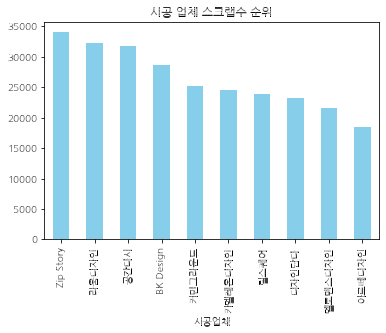

In [ ]:
ohhouse_df.groupby('시공업체')['스크랩수'].sum().sort_values(ascending=False).iloc[:10].plot(kind='bar', color='skyblue')
plt.title('시공 업체 스크랩수 순위')

<br>

## **시공 업체 조회수 순위**

In [ ]:
ohhouse_df.groupby('시공업체')['조회수'].sum().sort_values(ascending=False).iloc[:20]

시공업체
라움디자인          2611469
Zip Story      2158537
디자인담다          1833067
공간다시           1622227
릴스퀘어           1509443
BK Design      1478057
(주)미소디자인       1418892
커먼그라운드         1399348
아르떼디자인         1334553
카멜레온디자인        1232998
멜로맨스디자인        1104308
홈라떼             949923
봄디자인            895404
퍼스트애비뉴 인테리어     823862
디자인브리드          820104
그리미디자인          724712
사람과공간 쉼표디자인     653125
라루나홈스타일링        630300
햇살장식 X 인테리어     612089
Ggdc            609005
Name: 조회수, dtype: int64

Text(0.5, 1.0, '시공 업체 조회수 순위')

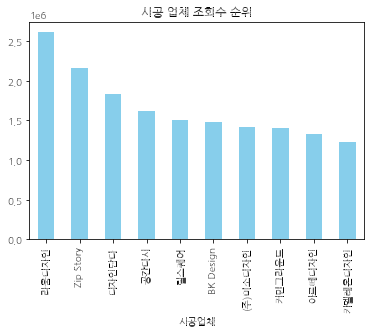

In [ ]:
ohhouse_df.groupby('시공업체')['조회수'].sum().sort_values(ascending=False).iloc[:10].plot(kind='bar', color='skyblue')
plt.title('시공 업체 조회수 순위')

<br>

## **가족형태 스크랩수 순위**

In [ ]:
ohhouse_df.groupby('가족형태')['스크랩수'].sum().sort_values(ascending=False)

가족형태
취학자녀    290289
신혼부부    274933
아기      201725
기타       58200
싱글       38342
부모님      36323
Name: 스크랩수, dtype: int64

Text(0.5, 1.0, '가족형태 스크랩수 순위')

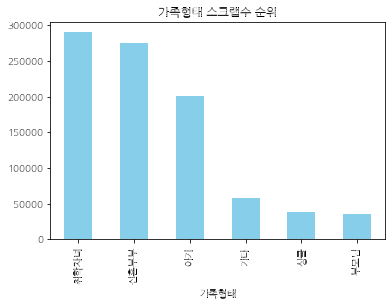

In [ ]:
ohhouse_df.groupby('가족형태')['스크랩수'].sum().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('가족형태 스크랩수 순위')

In [ ]:
ohhouse_df.groupby('가족형태')['스크랩수'].mean().sort_values(ascending=False)

가족형태
싱글      555.681159
신혼부부    527.702495
기타      480.991736
아기      480.297619
부모님     454.037500
취학자녀    404.866109
Name: 스크랩수, dtype: float64

<br>

## **가족형태 조회수 순위**

In [ ]:
ohhouse_df.groupby('가족형태')['조회수'].mean().sort_values(ascending=False)

가족형태
신혼부부    31374.733205
아기      31063.397619
기타      30884.396694
싱글      30011.913043
부모님     27854.162500
취학자녀    26356.629010
Name: 조회수, dtype: float64

Text(0.5, 1.0, '가족형태 조회수 순위')

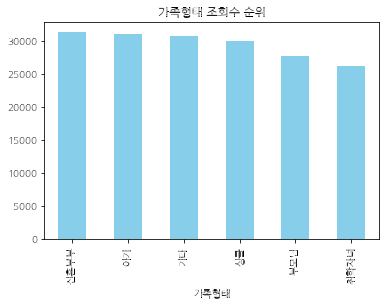

In [ ]:
ohhouse_df.groupby('가족형태')['조회수'].mean().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('가족형태 조회수 순위')

<br>

## **게시 년도 기준 분석**

### **게시 년도에 따른 게시글 수 변화**

Text(0.5, 1.0, '게시 년도에 따른 게시글 수 변화')

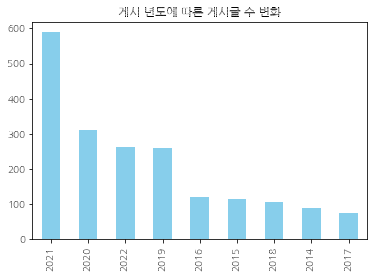

In [ ]:
ohhouse_df['게시일'].value_counts().plot(kind = 'bar', color = 'skyblue')
plt.title('게시 년도에 따른 게시글 수 변화')

### **게시 년도에 따른 가족형태별 게시글 수 변화**

<Figure size 576x432 with 0 Axes>

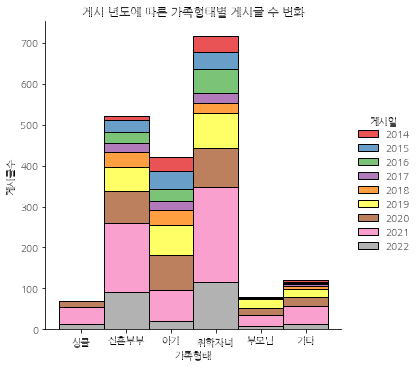

In [ ]:
plt.figure(figsize=(8,6))
sns.displot(data=ohhouse_df, x="가족형태", hue="게시일", multiple="stack", palette="Set1")
plt.ylabel("게시글수")
plt.title("게시 년도에 따른 가족형태별 게시글 수 변화");

plt.show()

### **게시 년도에 따른 스크랩 수 변화**

Text(0.5, 1.0, '게시 년도에 따른 스크랩 수 변화')

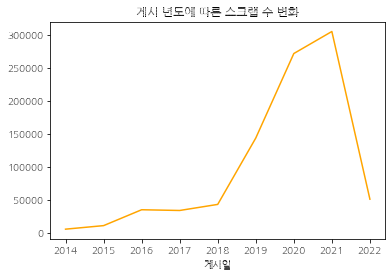

In [ ]:
ohhouse_df.groupby('게시일')['스크랩수'].sum().plot(kind='line', color='orange')
plt.title('게시 년도에 따른 스크랩 수 변화')

### **게시 년도에 따른 가족 형태 별 스크랩 수 평균 변화**

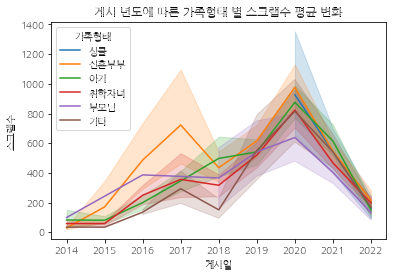

In [ ]:
sns.lineplot(data=ohhouse_df, x="게시일", y="스크랩수", hue="가족형태")
plt.title('게시 년도에 따른 가족형태 별 스크랩수 평균 변화')
plt.show()

### **게시 년도에 따른 조회 수 변화**

Text(0.5, 1.0, '게시 년도에 따른 조회 수 변화')

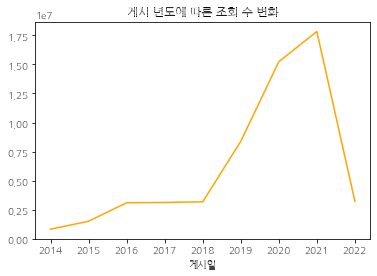

In [ ]:
ohhouse_df.groupby('게시일')['조회수'].sum().plot(kind='line', color='orange')
plt.title('게시 년도에 따른 조회 수 변화')

<br>

### **게시 년도에 따른 가족 형태 별 조회 수 평균 변화**

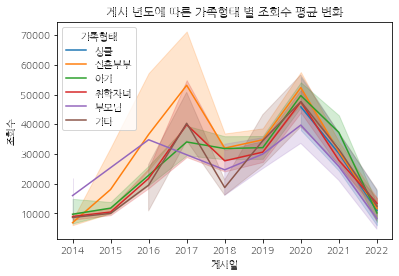

In [ ]:
sns.lineplot(data=ohhouse_df, x="게시일", y="조회수", hue="가족형태")
plt.title('게시 년도에 따른 가족형태 별 조회수 평균 변화')
plt.show()

<br>

### **조회수와 스크랩수의 상관관계**

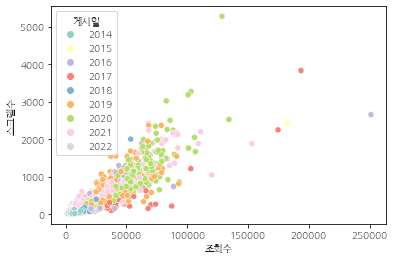

In [ ]:
sns.scatterplot(data=ohhouse_df, x="조회수", y="스크랩수", hue='게시일', palette="Set3")

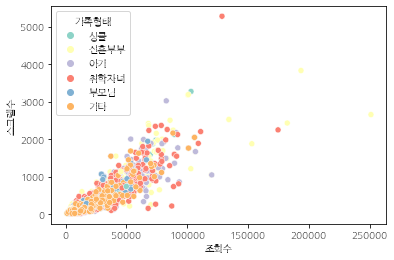

In [ ]:
sns.scatterplot(data=ohhouse_df, x="조회수", y="스크랩수", hue='가족형태', palette="Set3")

<br>

## **스타일**

In [ ]:
ohhouse_df['디자인'] = '미정'

In [ ]:
minimal = ohhouse_df[ohhouse_df['스타일'].str.contains('미니멀')]
minimal['디자인'] = '미니멀'

modern = ohhouse_df[ohhouse_df['스타일'].str.contains('모던')]
modern['디자인'] = '모던'

mid = ohhouse_df[ohhouse_df['스타일'].str.contains('미드')]
mid['디자인'] = '미드 센추리'

natural = ohhouse_df[ohhouse_df['스타일'].str.contains('내추럴')]
natural['디자인'] = '내추럴'

neroupe = ohhouse_df[ohhouse_df['스타일'].str.contains('북유럽')]
neroupe['디자인'] = '북유럽'

vintage = ohhouse_df[ohhouse_df['스타일'].str.contains('빈티지')]
vintage['디자인'] = '빈티지'

classic = ohhouse_df[ohhouse_df['스타일'].str.contains('클래식')]
classic['디자인'] = '클래식'

french = ohhouse_df[ohhouse_df['스타일'].str.contains('프렌치')]
french['디자인'] = '프렌치'

industrial = ohhouse_df[ohhouse_df['스타일'].str.contains('인더')]
industrial['디자인'] = '인더스트리얼'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
sum_df = [minimal, modern, mid, natural, neroupe, vintage, classic, french, industrial]
style = pd.concat(sum_df, axis=0)
style = style.reset_index()
style.drop_duplicates()


,index,가족형태,스타일,시공업체,게시일,스크랩수,조회수,디자인
0,21,싱글,화이트&블루 싱글라이프를 즐기는 미니멀한 하우스,지인인테리어 스튜디오영통,2021,227,9049,미니멀
1,32,싱글,미니멀라이프를 그리며 계획한 싱글남의 심플하우스,Ggdc,2021,1140,59423,미니멀
2,44,싱글,짙은 우드컬러로 묵직함 더한 미니멀 싱글하우스,플라이넷,2020,466,33287,미니멀
3,48,싱글,미니멀에 컬러를 더하다,청유,2020,1118,48229,미니멀
4,50,싱글,"미니멀의 극치, 싱글하우스 인테리어",므나디자인 스튜디오,2020,1067,38605,미니멀
...,...,...,...,...,...,...,...,...
612,1908,기타,디자인과 실용성 모두 사로잡은 모던프렌치 인테리어!,오렌지블럭,2018,182,15544,프렌치
613,1917,기타,우아한 감성을 담은 프렌치모던 스타일,이즈홈인테리어,2016,159,28323,프렌치
614,432,신혼부부,수원 망포동 26평 : 인더스트리얼 인테리어,아르떼디자인,2018,419,28520,인더스트리얼
615,1564,취학자녀,카페무드를 가진 인더스트리얼 하우스,모퉁이돌디자인,2016,169,17303,인더스트리얼


## **스타일 별 게시글 수 순위**

In [ ]:
style['디자인'].value_counts()

모던        281
미니멀        95
내추럴        89
클래식        69
프렌치        34
빈티지        22
북유럽        21
미드 센추리      3
인더스트리얼      3
Name: 디자인, dtype: int64

Text(0.5, 1.0, '스타일 별 게시글 수 순위')

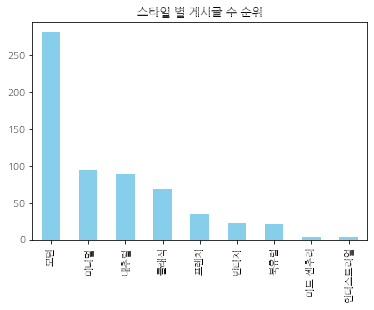

In [ ]:
style['디자인'].value_counts().plot(kind = 'bar', color = 'skyblue')
plt.title('스타일 별 게시글 수 순위')

<br>

## **스타일 별 스크랩수 순위**

In [ ]:
style.groupby('디자인')['스크랩수'].sum().sort_values(ascending = False)

디자인
모던        121658
내추럴        57430
미니멀        53542
클래식        26630
프렌치        26067
빈티지         8270
북유럽         6643
미드 센추리       975
인더스트리얼       626
Name: 스크랩수, dtype: int64

In [ ]:
 57430-53542

3888

Text(0.5, 1.0, '스타일 별 스크랩수 순위')

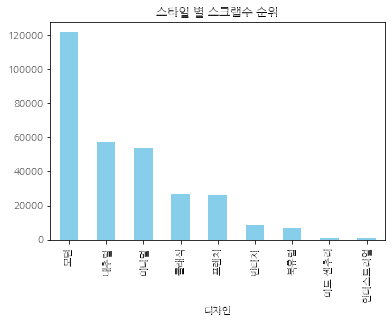

In [ ]:
style.groupby('디자인')['스크랩수'].sum().sort_values(ascending = False).plot(kind = 'bar', color = 'skyblue')
plt.title('스타일 별 스크랩수 순위')

<br>

## **스타일 별 조회수 순위**

Text(0.5, 1.0, '스타일 별 조회수 순위')

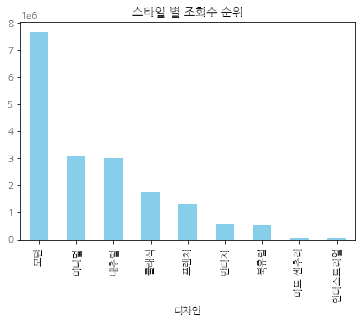

In [ ]:
style.groupby('디자인')['조회수'].sum().sort_values(ascending = False).plot(kind = 'bar', color = 'skyblue')
plt.title('스타일 별 조회수 순위')

<br>

## **게시년도에 따른 스타일 별 평균 스크랩수 변화**

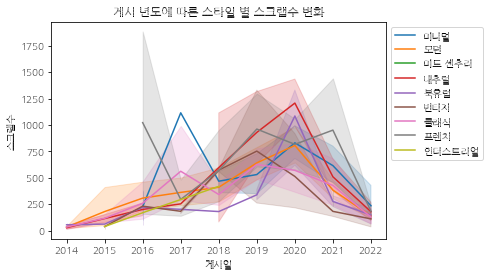

In [ ]:
sns.lineplot(data=style, x="게시일", y="스크랩수", hue="디자인")
plt.title('게시 년도에 따른 스타일 별 스크랩수 변화')
plt.legend(bbox_to_anchor = (1,1))
plt.show()

<br>

## **게시년도에 따른 스타일 별 평균 조회수 변화**

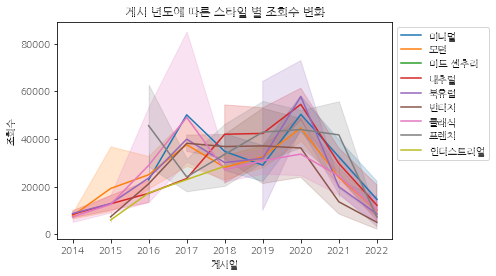

In [ ]:
sns.lineplot(data=style, x="게시일", y="조회수", hue="디자인")
plt.title('게시 년도에 따른 스타일 별 조회수 변화')
plt.legend(bbox_to_anchor = (1,1))
plt.show()

<br>

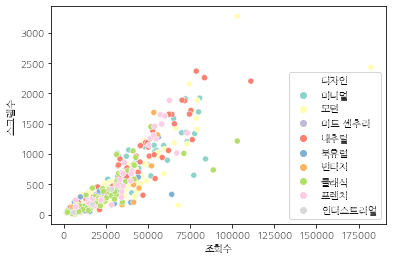

In [ ]:
sns.scatterplot(data=style, x="조회수", y="스크랩수", hue='디자인', palette="Set3")

<br>

<br>